# W vs Z Graph - All Three Fibres

Import all modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from scipy.optimize import curve_fit
from os import listdir
import scipy

from lvl4_functions import *

Import all key data and parameters

Saving the important info in an array like:
x values
x errs
y values
y errs
residuals 

Second array:
w0, w0err
z0,z0_err
RR, RRerr
z_end, z_end_err

In [6]:
cl_x, cl_x_errs, cl_y, cl_y_errs, cl_res = np.load('graph_cleaved.npy')
cl_w0, cl_w0_err, cl_z0, cl_z0_err, cl_RR, cl_RR_err, cl_zend, cl_zend_err = np.load('params_cleaved.npy')

f2_x, f2_x_errs, f2_y, f2_y_errs, f2_res = np.load('graph_fibre2.npy')
f2_w0, f2_w0_err, f2_z0, f2_z0_err, f2_RR, f2_RR_err, f2_zend, f2_zend_err = np.load('params_fibre2.npy')

f3_x, f3_x_errs, f3_y, f3_y_errs, f3_res = np.load('graph_fibre3.npy')
f3_w0, f3_w0_err, f3_z0, f3_z0_err, f3_RR, f3_RR_err, f3_zend, f3_zend_err = np.load('params_fibre3.npy')

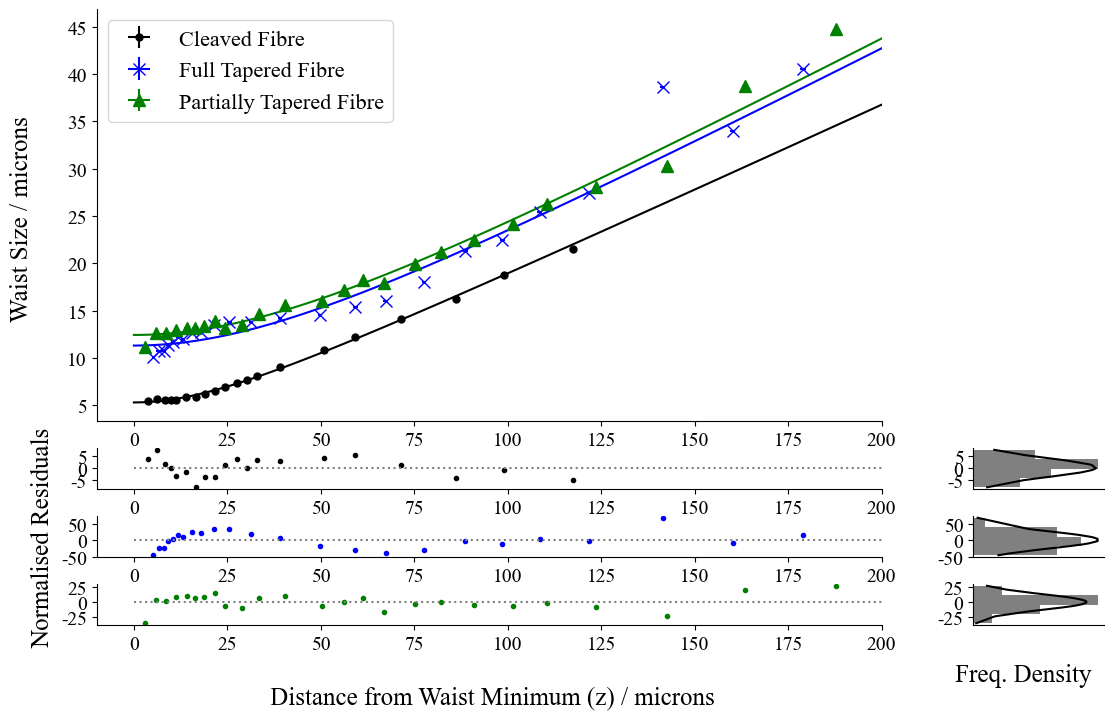

In [81]:
# Create Figure
fig, ax = plt.subplots(4,2,height_ratios=(10,1,1,1), width_ratios=(6,1), figsize = (13,8))

# Font Settings
font = mpl.font_manager.FontProperties(family='Times New Roman',
style='normal', size=16)

# Kill dead plots
ax[0,1].axis('off')
# Kill spines
for i in range(4):
    for j in range(2):
        ax[i,j].spines['top'].set_visible(False)
        ax[i,j].spines['right'].set_visible(False)

# Plot waists vs Z:
ax[0,0].errorbar(cl_x, cl_y, xerr = cl_x_errs, yerr = cl_y_errs, color = 'black', linestyle = '', marker = 'o', ms = 5, label = 'Cleaved Fibre')
ax[0,0].errorbar(f2_x, f2_y, xerr = f2_x_errs, yerr = f2_y_errs, color = 'blue', linestyle = '', marker = 'x', ms = 8, label = 'Full Tapered Fibre')
ax[0,0].errorbar(f3_x, f3_y, xerr = f3_x_errs, yerr = f3_y_errs, color = 'green', linestyle = '', marker = '^', ms = 8, label = 'Partially Tapered Fibre')

# Using gauss function to produce fits
x_fit = np.linspace(0,200,100)
cl_y_fit = WvsZ(x_fit, cl_w0, 0, cl_RR)
f2_y_fit = WvsZ(x_fit, f2_w0, 0, f2_RR)
f3_y_fit = WvsZ(x_fit, f3_w0, 0, f3_RR)
ax[0,0].plot(x_fit, cl_y_fit, color = 'black')
ax[0,0].plot(x_fit, f2_y_fit, color = 'blue')
ax[0,0].plot(x_fit, f3_y_fit, color = 'green')

# x axis limits
for i in range(4):
    ax[i,0].set_xlim(-10,200)

# Residuals
ax[1,0].errorbar(cl_x,cl_res, color = 'k', linestyle = '', marker = 'o', ms = 3)
ax[2,0].errorbar(f2_x,f2_res, color = 'blue', linestyle = '', marker = 'o', ms = 3)
ax[3,0].errorbar(f3_x,f3_res, color = 'green', linestyle = '', marker = 'o', ms = 3)

# Histograms
clmean, clstderr, clsorted_res, cldist = histogram_plot(cl_res)
f2mean, f2stderr, f2sorted_res, f2dist = histogram_plot(f2_res)
f3mean, f3stderr, f3sorted_res, f3dist = histogram_plot(f3_res)
ax[1,1].plot(cldist, clsorted_res, color = 'black')
ax[2,1].plot(f2dist, f2sorted_res, color = 'black')
ax[3,1].plot(f3dist, f3sorted_res, color = 'black')
ax[1,1].hist(clsorted_res, density = True, orientation = 'horizontal', color = 'grey', bins = 4)
ax[2,1].hist(f2sorted_res, density = True, orientation = 'horizontal', color = 'grey', bins = 4)
ax[3,1].hist(f3sorted_res, density = True, orientation = 'horizontal', color = 'grey', bins = 4)

for i in range(3):
    ax[i+1,0].errorbar([0,200], [0,0], color = 'grey', linestyle = 'dotted')

# Axis labels
ax[3,0].set_xlabel('\n Distance from Waist Minimum (z) / microns', font = 'Times New Roman', fontsize = 18)
ax[0,0].set_ylabel('Waist Size / microns \n', font = 'Times New Roman', fontsize = 18)
ax[2,0].set_ylabel('Normalised Residuals', font = 'Times New Roman', fontsize = 18)
ax[3,1].set_xlabel('\n Freq. Density      ', font = 'Times New Roman', fontsize = 18)

# Make visible ticks times new roman
smallsize = 14
for i in range(4):
    ax[i,0].set_xticks(ticks = np.arange(0,210,25), labels = np.arange(0,210,25), fontfamily = 'Times New Roman', fontsize = smallsize)
    ax[i,1].set_xticks(ticks = [], labels = [], fontfamily = 'Times New Roman', fontsize = smallsize)
for j in range(2):
    ax[1,j].set_yticks(ticks = np.arange(-5,6,5), labels = np.arange(-5,6,5), fontfamily = 'Times New Roman', fontsize = smallsize)
    ax[2,j].set_yticks(ticks = np.arange(-50,60,50), labels = np.arange(-50,60,50), fontfamily = 'Times New Roman', fontsize = smallsize)
    ax[3,j].set_yticks(ticks = np.arange(-25,26,25), labels = np.arange(-25,26,25), fontfamily = 'Times New Roman', fontsize = smallsize)
ax[0,0].set_yticks(ticks = np.arange(5,46,5), labels = np.arange(5,46,5), fontfamily = 'Times New Roman', fontsize = smallsize)

# legend
ax[0,0].legend(prop = font)